# Notes About Data
 - hits files give you the data for just the hits
 -- hit_id tracks the hit (basically just counts them up, for the most part I think its useless)
 -- x,y,z measure the physical position of the hit in global coordinates
 -- volume_id gives the detector group
 -- layer_id is the layer inside the detector group
 -- module id is the detector module inside the layer
 - event truth file is the file that actually gives the tracking for the particle
 -- particle_id gives the generating particle
 -- tx, ty, tz: true intesection point between the particle trajectory and the sensor
 -- tpx... is the true momentum at the intersection points
 
 

# Data Visualization

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
#import pandas as pd

import tensorflow as tf
import plotting
from functions import *
import plotting_functions as plot
from models import * 
from model_functions import *

#Stops warning for chained assignment with pandas dataframe
pd.options.mode.chained_assignment = None  # default='warn'





hits_file = './Data/event100000594-hits.csv'
hits1 = pd.read_csv(hits_file)


In [19]:
test_df = pd.DataFrame({'x':[1,2,3], 'y':[3,5,6]})
display(test_df)
spherical_conversion(test_df)

,x,y
0,1,3
1,2,5
2,3,6


,r,phi
0,3.162278,1.249046
1,5.385165,1.190290
2,6.708204,1.107149


In [20]:
file = './Data/event100000594-truth.csv'
truth = pd.read_csv(file)
plt.clf()
#print(hits1.loc[hits1['hit_id']==67478])
print("Truth Data")
display(truth)
#Plots the path of a particle throughout the detector, you need to keep track of the particle_id to do this


Truth Data


,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,1,0,-59.2562,-9.34505,-1067.00,0,0,0,0.0
1,2,0,-66.5842,-17.68480,-1067.00,0,0,0,0.0
2,3,0,-73.3880,-16.37420,-1067.00,0,0,0,0.0
3,4,0,-71.1577,-6.52260,-1067.00,0,0,0,0.0
4,5,0,-73.6103,-16.07450,-1067.00,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...
424540,424541,0,924.7850,-155.11500,2860.75,0,0,0,0.0
424541,424542,0,926.2700,-145.99000,2860.75,0,0,0,0.0
424542,424543,0,926.3260,-145.63300,2860.75,0,0,0,0.0
424543,424544,0,926.8440,-142.29600,2860.75,0,0,0,0.0


<Figure size 432x288 with 0 Axes>

In [21]:
file_particle = './Data/event100000594-particles.csv'
particle = pd.read_csv(file_particle, names= ['particle_id','particle_type','vx','vy','vz','px',
                                             'py','pz','q','nhits'], skiprows=2)

#particle = particle.drop(labels=0,axis=0)
print('Particle Data')
display(particle)
#Gives the initial position of particles, the graph makes sense as particles
#plt.plot(particle['vx'], particle['vy'])

Particle Data


,particle_id,particle_type,vx,vy,vz,px,py,pz,q,nhits
0,2,-211,0.005988,-0.010026,-12.5230,641.9330,7262.880,-5112.320,-1,14
1,3,-211,0.005988,-0.010026,-12.5230,-1010.7400,1329.580,-12147.800,-1,15
2,4,211,0.005988,-0.010026,-12.5230,-729.9480,934.522,2124.680,1,14
3,6,-321,0.005988,-0.010026,-12.5230,86.6833,-1224.000,-3277.490,-1,20
4,7,211,0.005988,-0.010026,-12.5230,-737.1860,745.819,-20818.800,1,16
...,...,...,...,...,...,...,...,...,...,...
1219,1280,-11,0.341623,0.170895,-146.6370,993.5230,190.426,-492.571,1,15
1220,1281,211,-0.011731,-0.005195,-12.2234,-438.1440,1393.080,637.472,1,15
1221,1282,-211,-0.011731,-0.005195,-12.2234,-263.8430,-2316.000,2185.540,-1,13
1222,1283,-321,-0.011731,-0.005195,-12.2234,-163.5990,1230.780,344.232,-1,14


In [22]:
def mask(df, group = 'particle_id'):
    grouped = df.groupby(group)
    #Runs over all the values for the particle id and find the group that is the longest,
    #then add rows of zeroes until every group has the same length
    unique_id = unique(df[group].values)
    lengths = []
    for i in unique_id:
        group = grouped.get_group(i)
        length = len(group)
        lengths.append(length)
    #print('This is the lengths', lengths)
    max_length = max(lengths)
    
    recombine = []
    for i in unique_id:
        group = grouped.get_group(i)
        length = len(group)
        if length < max_length:
            n = max_length - length
            append_df = pd.DataFrame([[0]* df.shape[1]] * n, columns = df.columns)
            append_df['particle_id'] = i
            group = group.append(append_df)
            recombine.append(group)
    final_df = pd.concat(recombine)
    #print('fixed df')
    #display(final_df)
    return final_df
            
            
    

# Data Preprocessing
To standardize I could add the most negative number to the values to make them all positive and then normalize between 0 and 1. 

In [23]:

def split_data(groupby,split):
    size = groupby.ngroups
    test_size = int(size * split[0])
    train_size
    for i in range(groupby.ngroups):
        groupby.get_group(i)
def data_preprocessor(df):
    df = df.loc[df['particle_id'] != 0]
    grouped = df.groupby(df.particle_id)
    
def unique(list1):
    # initialize a null list
    unique_list = []
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    return unique_list
    

[      11     1082       11 ...     1272     1272 93537254]


,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id
193,194,-54.1530,-29.5583,-1063.00,70,0,6,11
207,208,-63.2941,-38.8330,-1063.00,70,0,6,1082
222,223,-60.5370,-32.8806,-1186.00,70,1,7,11
274,275,-67.7342,-36.6425,-1324.00,70,2,8,11
369,370,-55.0948,-56.0556,-1067.00,70,0,12,261
...,...,...,...,...,...,...,...,...
424415,424416,682.0310,-197.9130,2854.25,14,5,17876,509
424426,424427,682.0470,-197.8590,2860.75,14,5,17877,509
424521,424522,881.3150,-104.9620,2854.25,14,5,17886,1272
424538,424539,881.2700,-105.3370,2860.75,14,5,17887,1272


,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id
328066,328067,-411.46200,-400.9760,-674.4070,13,1,6383,1
163254,163255,-166.92000,-159.9310,-172.1300,83,0,5450,1
367932,367933,-722.25700,-706.2460,-1299.7900,13,3,12865,1
367930,367931,-717.69400,-701.4040,-1298.0700,13,3,12864,1
177751,177752,-208.59500,-201.0640,-257.5310,84,0,7287,1
...,...,...,...,...,...,...,...,...
54005,54006,-9.68781,36.8139,12.7655,80,0,1799,1284
104770,104771,-23.76110,94.6323,51.8598,81,0,2940,1284
173077,173078,-59.79660,283.6050,178.1690,84,0,6614,1284
157859,157860,-50.65300,227.5340,140.8160,83,0,4948,1284


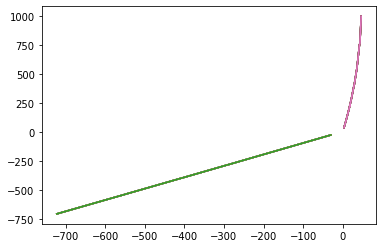

In [24]:
# First attempt with all values positive and
## Do I take out all particle_id =0 as they are noise? 
hits_file = './Data/event100000594-hits.csv'
data = pd.read_csv(hits_file)
#display(data)
data['particle_id'] =truth['particle_id']
data = data.loc[data['particle_id']!= 0]
print(data['particle_id'].values)
#data = data.sort_values('particle_id')
display(data)

data = track_length(data, 8)
data_group = data.groupby('particle_id')

data = data.sort_values('particle_id')
display(data)



for i in data['particle_id'].values:
    #Change this number to display more paths
    if i < 3:
        data_new = data_group.get_group(i)
        plt.plot(data_new['x'], data_new['y'])
plt.show()

In [25]:
def sort_radius(df):
    df['radius'] = df['x']**2 + df['y']**2 + df['z']**2
    df = df.sort_values('radius', ascending=True)
    return df
def normalization(df):
    for column in df.columns:
        if column != 'particle_id':
            df[column] = df[column].values/max(abs(df[column].values))
    return df

In [26]:
test_df = data_group.get_group(1)
display(test_df)
display(sort_radius(test_df))

,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id
67477,67478,-29.6318,-24.1577,109.4660,80,0,2094,1
118823,118824,-75.4969,-69.5659,15.3505,81,0,3215,1
147380,147381,-115.5260,-109.1620,-66.7765,82,0,4173,1
163254,163255,-166.9200,-159.9310,-172.1300,83,0,5450,1
177751,177752,-208.5950,-201.0640,-257.5310,84,0,7287,1
297733,297734,-287.2880,-279.0840,-429.1760,13,0,4426,1
297752,297753,-292.1070,-283.4500,-428.8590,13,0,4427,1
328046,328047,-406.5730,-396.5250,-672.4090,13,1,6382,1
328066,328067,-411.4620,-400.9760,-674.4070,13,1,6383,1
351533,351534,-548.5080,-535.6620,-954.4080,13,2,9176,1


,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id,radius
118823,118824,-75.4969,-69.5659,15.3505,81,0,3215,1,1.077483e+04
67477,67478,-29.6318,-24.1577,109.4660,80,0,2094,1,1.344444e+04
147380,147381,-115.5260,-109.1620,-66.7765,82,0,4173,1,2.972170e+04
163254,163255,-166.9200,-159.9310,-172.1300,83,0,5450,1,8.306895e+04
177751,177752,-208.5950,-201.0640,-257.5310,84,0,7287,1,1.502608e+05
297733,297734,-287.2880,-279.0840,-429.1760,13,0,4426,1,3.446143e+05
297752,297753,-292.1070,-283.4500,-428.8590,13,0,4427,1,3.495904e+05
328046,328047,-406.5730,-396.5250,-672.4090,13,1,6382,1,7.746675e+05
328066,328067,-411.4620,-400.9760,-674.4070,13,1,6383,1,7.849075e+05
351533,351534,-548.5080,-535.6620,-954.4080,13,2,9176,1,1.498689e+06


In [27]:
#Train_test_split puts the data into lists and then in this code block, I made everything into a numpy array
data = pd.read_csv(hits_file)
data['particle_id'] =truth['particle_id']
data = data.loc[data['particle_id']!= 0]
data.drop(['hit_id','volume_id', 'layer_id','module_id'], inplace = True, axis =1)

display(data)
#plotting.plot_tracks(data, 10)


#print(data.loc[data['particle_id']==559])
train_data_x, train_data_y, test_data_x, test_data_y, max_values = train_test_split(data, width=8, dimension=1,
                                                                                    variables=['x'])

print(max_values)
print(train_data_x[0])




#print(train_data_x)

,x,y,z,particle_id
193,-54.1530,-29.5583,-1063.00,11
207,-63.2941,-38.8330,-1063.00,1082
222,-60.5370,-32.8806,-1186.00,11
274,-67.7342,-36.6425,-1324.00,11
369,-55.0948,-56.0556,-1067.00,261
...,...,...,...,...
424415,682.0310,-197.9130,2854.25,509
424426,682.0470,-197.8590,2860.75,509
424521,881.3150,-104.9620,2854.25,1272
424538,881.2700,-105.3370,2860.75,1272


[0. 0. 0. ... 0. 0. 0.]

 Training on this many different groups: 
 1175
[1013.5]
[[-0.01745318]
 [-0.04310794]
 [-0.04714968]
 [-0.04784894]
 [-0.05114297]
 [-0.05182151]
 [-0.07268229]
 [-0.10346719]]


In [28]:
def unnormalize(array):
    unnorm_array = array
    for track in unnorm_array:
        for hit in track:
            hit[0] = hit[0] * max_values[0]
            hit[1] = hit[1] * max_values[1]
            hit[2] = hit[2] * max_values[2]
            
    return unnorm_array

# Creating Datasets

conv_model = tf

In [29]:
train_data_x_array = np.array(train_data_x)
print(train_data_x_array)
train_data_y_array = np.array(train_data_y)
test_data_x_array = np.array(test_data_x)
test_data_y_array = np.array(test_data_y)







[[[-0.01745318]
  [-0.04310794]
  [-0.04714968]
  ...
  [-0.05182151]
  [-0.07268229]
  [-0.10346719]]

 [[ 0.02610893]
  [ 0.02622832]
  [ 0.02893399]
  ...
  [ 0.0323408 ]
  [ 0.03565081]
  [ 0.0357632 ]]

 [[ 0.01154494]
  [ 0.02848081]
  [ 0.04364105]
  ...
  [ 0.07705703]
  [ 0.09269176]
  [ 0.09396803]]

 ...

 [[ 0.03643315]
  [ 0.03666956]
  [ 0.04055254]
  ...
  [ 0.05095412]
  [ 0.06038717]
  [ 0.0674224 ]]

 [[ 0.02708318]
  [ 0.02723266]
  [ 0.03016576]
  ...
  [ 0.0338891 ]
  [ 0.03781687]
  [ 0.04499842]]

 [[ 0.01651633]
  [ 0.01661233]
  [ 0.01836053]
  ...
  [ 0.02057296]
  [ 0.02292501]
  [ 0.0230298 ]]]


In [30]:
#Compiling the model


In [31]:
#print(train_data_x)
print(train_data_x_array[0])
#print(train_data_x_array[0][0][1])
print(train_data_x_array.shape)
print(train_data_y_array.shape)
print(test_data_x_array.shape)


[[-0.01745318]
 [-0.04310794]
 [-0.04714968]
 [-0.04784894]
 [-0.05114297]
 [-0.05182151]
 [-0.07268229]
 [-0.10346719]]
(1057, 8, 1)
(1057, 1, 1)
(118, 8, 1)


In [32]:
test = TrackModelDropoutRelu('relu', 'neurons', 'output', 0.05)
#test_cyl = TestModel4('tanh', 'neurons', 'output')


In [33]:
print(test_data_x_array.shape)
print(test_data_y_array.shape)

(118, 8, 1)
(118, 1, 1)


../Results/Dropout
Epoch 1/100
27/27 [==============================] - 1s 7ms/step - loss: 0.0684 - val_loss: 0.0280
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0671 - val_loss: 0.0273
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0669 - val_loss: 0.0274
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0669 - val_loss: 0.0274
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0669 - val_loss: 0.0273
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0669 - val_loss: 0.0274
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0669 - val_loss: 0.0273
Epoch 8/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0669 - val_loss: 0.0273
Epoch 9/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0669 - val_loss: 0.0273
Epoch 10/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0669 - val_los

Epoch 83/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0668 - val_loss: 0.0273
Epoch 84/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0668 - val_loss: 0.0273
Epoch 85/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0668 - val_loss: 0.0273
Epoch 86/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0668 - val_loss: 0.0273
Epoch 87/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0668 - val_loss: 0.0273
Epoch 88/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0668 - val_loss: 0.0273
Epoch 89/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0668 - val_loss: 0.0273
Epoch 90/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0668 - val_loss: 0.0273
Epoch 91/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0668 - val_loss: 0.0273
Epoch 92/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0668 - val_loss: 0.0273


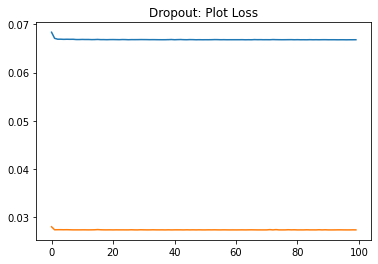

length of valid_data_y 
 118
length of prediction 
 118
length of residual 
 118
shape of predictions (118, 1, 3)


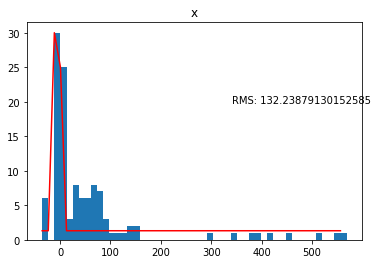

In [34]:
model_trainer(test, 'Dropout', train_data_x_array, train_data_y_array, test_data_x_array, 
              test_data_y_array, max_values, save=False, save_dir='../Results', bad_points=True, dimensions=1)
